In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression


In [19]:
df=pd.read_csv('creditcard.csv', sep=',')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
def roc_out(y_test,y_pred_test):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr,'k--', lw=1)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    roc_auc_score(y_test,y_pred_test)

In [21]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'],axis=1), df.Class, test_size=0.3, random_state=42)
param = { 
    
    'solver': ['newton-cg', 'sag', 'saga','lbfgs','liblinear']
}

In [18]:
clf=LogisticRegression(random_state=42)

In [19]:
cv_rf=GridSearchCV(estimator=clf, param_grid=param , cv= 5,n_jobs=-1,verbose=2)
cv_rf.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] solver=newton-cg ................................................
[CV] solver=newton-cg ................................................
[CV] solver=newton-cg ................................................
[CV] solver=newton-cg ................................................


/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not c

[CV] ................................. solver=newton-cg, total=  34.5s
[CV] solver=newton-cg ................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................................. solver=newton-cg, total=  35.5s
[CV] solver=sag ......................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................................. solver=newton-cg, total=  36.1s
[CV] solver=sag ......................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................................. solver=newton-cg, total=  37.5s
[CV] solver=sag ......................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ................................. solver=newton-cg, total=  31.5s
[CV] solver=sag ......................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....................................... solver=sag, total=  31.3s
[CV] solver=sag ......................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....................................... solver=sag, total=  31.7s
[CV] solver=saga .....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....................................... solver=sag, total=  30.8s
[CV] solver=saga .....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....................................... solver=sag, total=  21.5s
[CV] solver=saga .....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....................................... solver=sag, total=  23.3s
[CV] solver=saga .....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...................................... solver=saga, total=  23.9s
[CV] solver=saga .....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...................................... solver=saga, total=  24.4s
[CV] solver=lbfgs ....................................................
[CV] ..................................... solver=lbfgs, total=   3.9s
[CV] solver=lbfgs ....................................................
[CV] ..................................... solver=lbfgs, total=   3.9s
[CV] solver=lbfgs ....................................................
[CV] ..................................... solver=lbfgs, total=   2.8s
[CV] solver=lbfgs ....................................................
[CV] ..................................... solver=lbfgs, total=   4.0s
[CV] solver=lbfgs ....................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...................................... solver=saga, total=  21.9s
[CV] solver=liblinear ................................................
[CV] ..................................... solver=lbfgs, total=   3.5s
[CV] solver=liblinear ................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...................................... solver=saga, total=  22.3s
[CV] solver=liblinear ................................................
[CV] ................................. solver=liblinear, total=   4.1s
[CV] solver=liblinear ................................................


/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...................................... solver=saga, total=  23.1s
[CV] solver=liblinear ................................................
[CV] ................................. solver=liblinear, total=   4.2s
[CV] ................................. solver=liblinear, total=   3.2s
[CV] ................................. solver=liblinear, total=   3.2s
[CV] ................................. solver=liblinear, total=   2.0s


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [23]:
cv_rf.best_params_


{'solver': 'newton-cg'}

In [22]:
clf=LogisticRegression(solver='newton-cg',class_weight={1:99,0:1})

In [23]:
clf.fit(X_train,y_train)

/home/avi/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight={1: 99, 0: 1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85307
          1       0.24      0.89      0.38       136

avg / total       1.00      1.00      1.00     85443



In [26]:
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    199008
          1       0.27      0.87      0.41       356

avg / total       1.00      1.00      1.00    199364



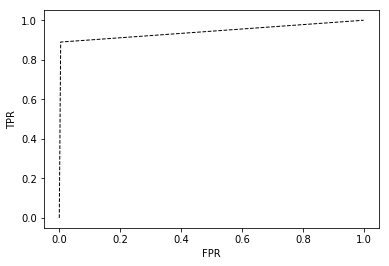

In [27]:
roc_out(y_test,y_pred_test)

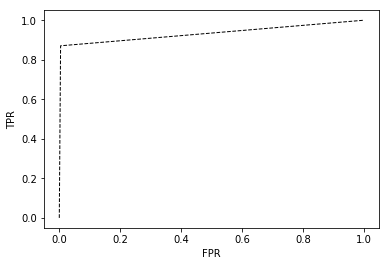

In [28]:
roc_out(y_train,y_pred_train)

In [29]:
len(y_pred_test[y_test!=y_pred_test])

403

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.9425788018913005

In [31]:
roc_auc_score(y_train,y_pred_train)

0.93326520327340456